## Link between Groceries and Income 

For Ward, MSOA and LSOA

In [2]:
# Import useful libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn import linear_model, model_selection

### Data Cleaning

In [3]:
# Load Data 

data_folder = './data/'

groceries_ward = pd.read_csv(data_folder + 'year_osward_grocery.csv')
groceries_msoa = pd.read_csv(data_folder + 'year_msoa_grocery.csv')
groceries_lsoa = pd.read_csv(data_folder + 'year_lsoa_grocery.csv')
income_ward = pd.read_csv(data_folder + 'modelled-household-income-estimates-wards.csv', encoding='latin1')
income_msoa = pd.read_csv(data_folder + 'modelled-household-income-estimates-msoa.csv', encoding='latin1')
income_lsoa = pd.read_csv(data_folder + 'modelled-household-income-estimates-lsoa.csv', encoding='latin1')


In [4]:
print(f'We have Shopping data for {len(groceries_ward)} Wards, {len(groceries_msoa)} MSOAs and {len(groceries_lsoa)} LSOAs')
print(f'We have Income data for {len(income_ward)} Wards, {len(income_msoa)} MSOAs and {len(income_lsoa)} LSOAs')


We have Shopping data for 638 Wards, 983 MSOAs and 4833 LSOAs
We have Income data for 625 Wards, 983 MSOAs and 4835 LSOAs


In [5]:
def clean_income_value(income):
    """ Transforms the string '£XX,XXX' into the corresponding integer value XXXXX, if an integer value is given returns it"""
    return int(income[1:].replace(',','')) if type(income) != int else income

In [51]:
# Clean the Dataframe so we can use the values 
years = ['01/02', '02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13']
for year in years :
    mean_column = 'Mean 20' + year
    median_column = 'Median 20' + year
    # MSOA
    income_msoa[mean_column] = income_msoa[mean_column].map(lambda i : clean_income_value(i) )
    income_msoa[median_column] = income_msoa[median_column].map(lambda i : clean_income_value(i))
    # LSOA
    income_lsoa[mean_column] = income_lsoa[mean_column].map(lambda i : clean_income_value(i) )
    income_lsoa[median_column] = income_lsoa[median_column].map(lambda i : clean_income_value(i))
    # Ward
    income_ward[mean_column] = income_ward[mean_column].map(lambda i : clean_income_value(i) )
    income_ward[median_column] = income_ward[median_column].map(lambda i : clean_income_value(i))
    
income_msoa.head()

,Code,Name,LAD code,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,E02000001,City of London 001,E09000001,City of London,65120,66410,69800,74510,76200,81300,...,45150,48070,48380,51410,53110,54960,57520,59240,62290,63620
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,24900,25210,26370,28050,28630,30520,...,23080,24510,24640,26180,27060,28030,29380,30310,31920,32660
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,30120,30420,31700,33610,34170,36270,...,27880,29500,29540,31250,32160,33160,34610,35540,37270,37970
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,30700,31010,32330,34280,34850,37010,...,28420,30070,30120,31870,32800,33830,35310,36270,38040,38770
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,26280,26670,27930,29740,30380,32400,...,24530,26080,26240,27880,28820,29840,31270,32240,33930,34690


### Data visualization

<ipython-input-196-35d676ba9b11>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(labels=mean_columns, rotation=90)
<ipython-input-196-35d676ba9b11>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(labels=median_columns, rotation=90)
<ipython-input-196-35d676ba9b11>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(labels=mean_columns, rotation=90)
<ipython-input-196-35d676ba9b11>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(labels=median_columns, rotation=90)
<ipython-input-196-35d676ba9b11>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2,0].set_xticklabels(labels=mean_columns, rotation=90)
<ipython-input-196-35d676ba9b11>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2,1].se

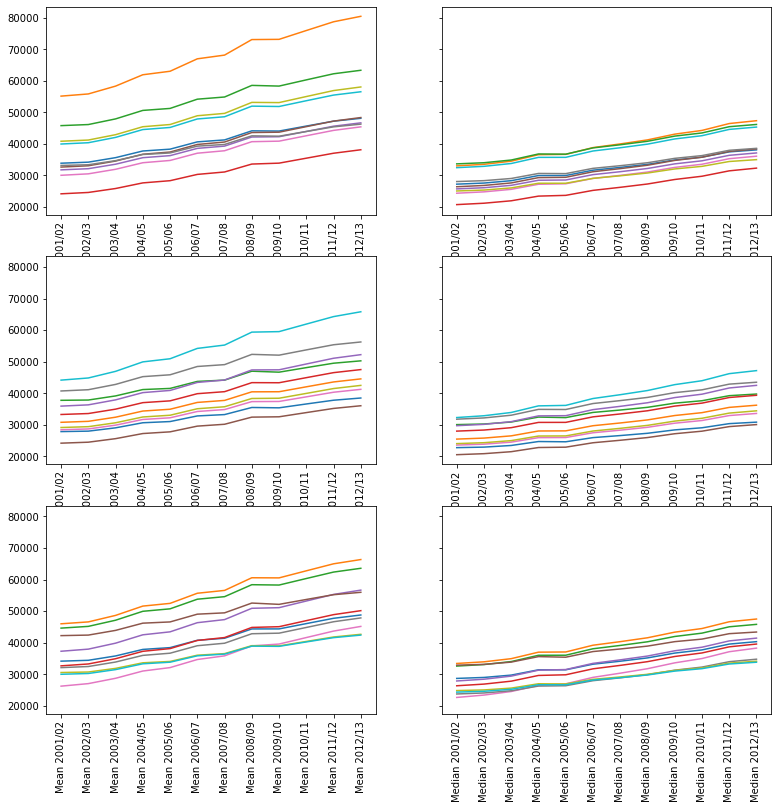

In [196]:
mean_columns = ['Mean 20' + year for year in years]
median_columns = ['Median 20' + year for year in years]

fig, axes = plt.subplots(3,2, figsize=(13,13), sharey=True)
ward_sample = np.random.choice(range(len(income_ward)), 10, replace=False)
msoa_sample = np.random.choice(range(len(income_msoa)), 10, replace=False)
lsoa_sample = np.random.choice(range(len(income_lsoa)), 10, replace=False)

for i in ward_sample:
    axes[0,0].plot(pd.DataFrame(income_ward.iloc[i][mean_columns]))
    axes[0,0].set_xticklabels(labels=mean_columns, rotation=90)
    axes[0,1].plot(pd.DataFrame(income_ward.iloc[i][median_columns]))
    axes[0,1].set_xticklabels(labels=median_columns, rotation=90)
    
for i in msoa_sample:
    axes[1,0].plot(pd.DataFrame(income_msoa.iloc[i][mean_columns]))
    axes[1,0].set_xticklabels(labels=mean_columns, rotation=90)
    axes[1,1].plot(pd.DataFrame(income_msoa.iloc[i][median_columns]))
    axes[1,1].set_xticklabels(labels=median_columns, rotation=90)
    
for i in lsoa_sample:
    axes[2,0].plot(pd.DataFrame(income_lsoa.iloc[i][mean_columns]))
    axes[2,0].set_xticklabels(labels=mean_columns, rotation=90)
    axes[2,1].plot(pd.DataFrame(income_lsoa.iloc[i][median_columns]))
    axes[2,1].set_xticklabels(labels=median_columns, rotation=90)

So first we are interested in seeing how the Mean and Median income evolves between the years. 

As we can see on the graph above, there are some outliers but we can see that overall the Mean and Median outcome tend to go up ! 

We decide to use the revenue for year 2012/13 as it is the closest data we have to 2015. Note that since we see a tendency to going growing, we can assume that an overall increasing trend is to be exected. 

We could find a regressor to find an expected value for 2014/15 

### Correlation between Groceries propostions and Income

In [195]:
# We only keep data for features of interest
features_of_interest = ['Code', 'Mean 2012/13', 'Median 2012/13']

income_ward_12_13 = income_ward[features_of_interest]
income_msoa_12_13 = income_msoa[features_of_interest]
income_lsoa_12_13 = income_lsoa[features_of_interest]

# Join the Income Data on the corresponding Shopping Data 

groceries_income_ward = groceries_ward.join(income_ward_12_13.set_index('Code'),on='area_id',how='inner').rename(columns={'Mean 2012/13': 'mean_income', 'Median 2012/13': 'median_income'})
groceries_income_msoa = groceries_msoa.join(income_msoa_12_13.set_index('Code'),on='area_id',how='inner').rename(columns={'Mean 2012/13': 'mean_income', 'Median 2012/13': 'median_income'})
groceries_income_lsoa = groceries_lsoa.join(income_lsoa_12_13.set_index('Code'),on='area_id',how='inner').rename(columns={'Mean 2012/13': 'mean_income', 'Median 2012/13': 'median_income'})

groceries_income_msoa.head()

for i  in income_ward_12_13['Mean 2012/13']:
    print (i)

99390
38870
37290
37860
38860
42780
37720
34140
38130
36080
46520
36280
36640
38390
37400
38080
36740
42530
53440
39000
52190
39990
50910
53550
55480
51380
61510
74940
54940
51650
51560
59790
56660
56260
63320
49390
56850
46620
51100
45990
40110
49390
48800
49400
48590
41250
41810
42600
46480
43510
39690
47030
42710
49520
35880
44610
53800
46390
49970
38410
38550
42740
49860
38230
41280
43960
33620
42750
52870
42280
45580
51340
44440
53850
43360
32250
41350
40860
39000
38290
38710
61330
52070
51480
55730
57790
59910
53100
55310
40390
39760
42730
54780
57400
59000
57560
40510
48100
45390
63410
50000
62610
59830
84280
62190
71650
60060
73370
99430
61590
104710
54740
75250
61920
63670
53190
50390
52460
46850
79860
72450
46520
47220
40730
37670
52750
58380
52180
47920
32760
48780
54850
35060
44870
55480
59000
37920
56510
48410
41840
40960
45670
42100
39350
41170
46260
53560
37130
59190
56300
41590
49650
38540
44830
58010
45900
41060
63700
46250
40330
36170
36730
45650
43350
35440
34530
663

In [161]:
for c in groceries_income_msoa:
    print(c)

area_id
weight
weight_perc2.5
weight_perc25
weight_perc50
weight_perc75
weight_perc97.5
weight_std
weight_ci95
volume
volume_perc2.5
volume_perc25
volume_perc50
volume_perc75
volume_perc97.5
volume_std
volume_ci95
fat
fat_perc2.5
fat_perc25
fat_perc50
fat_perc75
fat_perc97.5
fat_std
fat_ci95
saturate
saturate_perc2.5
saturate_perc25
saturate_perc50
saturate_perc75
saturate_perc97.5
saturate_std
saturate_ci95
salt
salt_perc2.5
salt_perc25
salt_perc50
salt_perc75
salt_perc97.5
salt_std
salt_ci95
sugar
sugar_perc2.5
sugar_perc25
sugar_perc50
sugar_perc75
sugar_perc97.5
sugar_std
sugar_ci95
protein
protein_perc2.5
protein_perc25
protein_perc50
protein_perc75
protein_perc97.5
protein_std
protein_ci95
carb
carb_perc2.5
carb_perc25
carb_perc50
carb_perc75
carb_perc97.5
carb_std
carb_ci95
fibre
fibre_perc2.5
fibre_perc25
fibre_perc50
fibre_perc75
fibre_perc97.5
fibre_std
fibre_ci95
alcohol
alcohol_perc2.5
alcohol_perc25
alcohol_perc50
alcohol_perc75
alcohol_perc97.5
alcohol_std
alcohol_ci95
en

In [83]:
categories_fraction = ['f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 
                       'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 
                       'f_water', 'f_wine']

nutrients_fraction = ['energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein',
                      'energy_carb', 'energy_fibre', 'energy_alcohol', 'energy_tot']

groceries_dfs = [('ward', groceries_income_ward), 
                 ('msoa', groceries_income_msoa), 
                 ('lsoa', groceries_income_lsoa)]

def compute_correlations_categories_incomes(df, income, categories=categories_fraction):
    r_values = []
    p_values = []
    category = []

    for cat in categories:
        correl, p_value = stats.spearmanr(df[cat],df[income])
        #print(f"- {cat} : {correl} with p-value {p_value}")
        r_values.append(correl)
        p_values.append(p_value)
        category.append(cat)


    correlation_df = pd.DataFrame({'Category' : category, 'R': r_values, 'p': p_values, 'statistically_significant' : [ p < 0.05 for p in p_values]})
    correlation_df
    
    return correlation_df

def compute_correlations_categories_incomes_list(dfs, income, categories=categories_fraction):
    correlation_df = pd.DataFrame({'Category' : categories})
    for name, df in dfs:
        r_values = []
        p_values = []

        for cat in categories:
            correl, p_value = stats.spearmanr(df[cat],df[income])
            #print(f"- {cat} : {correl} with p-value {p_value}")
            r_values.append(correl)
            p_values.append(p_value)

        correlation_df['R_'+name] = r_values
        correlation_df['p_'+name] = p_values
        correlation_df['stat_'+name] = [ p < 0.05 for p in p_values]
    
    return correlation_df

def compute_correlations_categories_incomes_grouped(dfs, income, categories=categories_fraction, category_name = 'category'):
    r_values = []
    p_values = []
    census = []
    for name, df in dfs:
        for cat in categories:
            correl, p_value = stats.spearmanr(df[cat],df[income])
            #print(f"- {cat} : {correl} with p-value {p_value}")
            r_values.append(correl)
            p_values.append(p_value)
            census.append(name)

    correlation_df = pd.DataFrame({category_name : categories * len(dfs), 'census': census, 'R': r_values, 'p': p_values, 'stat_sig' : [ p < 0.05 for p in p_values]})

    return correlation_df.groupby([category_name,'census']).sum()


In [84]:
# Computes the correlation between Mean Income in 2012/13 and the food categories ! 
correlation_all_census = compute_correlations_categories_incomes_grouped(dfs=groceries_dfs, income='mean_income')
correlation_all_census

R              p  stat_sig
category      census                                   
f_beer        lsoa    0.241147   6.712715e-65         1
              msoa    0.329865   2.209742e-26         1
              ward    0.401195   4.195477e-20         1
f_dairy       lsoa    0.091833   1.594078e-10         1
              msoa    0.132492   3.085086e-05         1
              ward    0.119722   8.443079e-03         1
f_eggs        lsoa    0.028132   5.050759e-02         0
              msoa    0.027963   3.811476e-01         0
              ward    0.013389   7.691430e-01         0
f_fats_oils   lsoa   -0.183435   7.721687e-38         1
              msoa   -0.215937   7.782019e-12         1
              ward   -0.252480   1.846039e-08         1
f_fish        lsoa    0.253897   5.632976e-72         1
              msoa    0.296938   1.845575e-21         1
              ward    0.290188   7.955804e-11         1
f_fruit_veg   lsoa    0.597351   0.000000e+00         1
              msoa    0.650042  4.106388e-119         1
              ward    0.679052   1.423276e-66         1
f_grains      lsoa   -0.457072  3.615007e-248         1
              msoa   -0.502994   3.682390e-64         1
              ward   -0.517392   2.008923e-34         1
f_meat_red    lsoa   -0.074594   2.084255e-07         1
              msoa   -0.072950   2.217616e-02         1
              ward   -0.095344   3.619338e-02         1
f_poultry     lsoa    0.000390   9.783816e-01         0
              msoa   -0.008226   7.967309e-01         0
              ward   -0.028251   5.356600e-01         0
f_readymade   lsoa   -0.037013   1.007233e-02         1
              msoa   -0.021158   5.075946e-01         0
              ward   -0.000089   9.984484e-01         0
f_sauces      lsoa   -0.000909   9.496522e-01         0
              msoa   -0.011878   7.099363e-01         0
              ward   -0.010733   8.139962e-01         0
f_soft_drinks lsoa   -0.612271   0.000000e+00         1
              msoa   -0.682148  1.581922e-135         1
              ward   -0.703869   1.838281e-73         1
f_spirits     lsoa   -0.300546  1.850425e-101         1
              msoa   -0.448386   8.681138e-50         1
              ward   -0.517000   2.296259e-34         1
f_sweets      lsoa   -0.447342  1.485453e-236         1
              msoa   -0.495276   5.735457e-62         1
              ward   -0.519211   1.076634e-34         1
f_tea_coffee  lsoa   -0.195203   1.030433e-42         1
              msoa   -0.282885   1.519790e-19         1
              ward   -0.306966   5.350043e-12         1
f_water       lsoa   -0.627915   0.000000e+00         1
              msoa   -0.733513  1.066356e-166         1
              ward   -0.763828   1.626275e-93         1
f_wine        lsoa    0.618267   0.000000e+00         1
              msoa    0.736352  1.240220e-168         1
              ward    0.764709   7.455158e-94         1

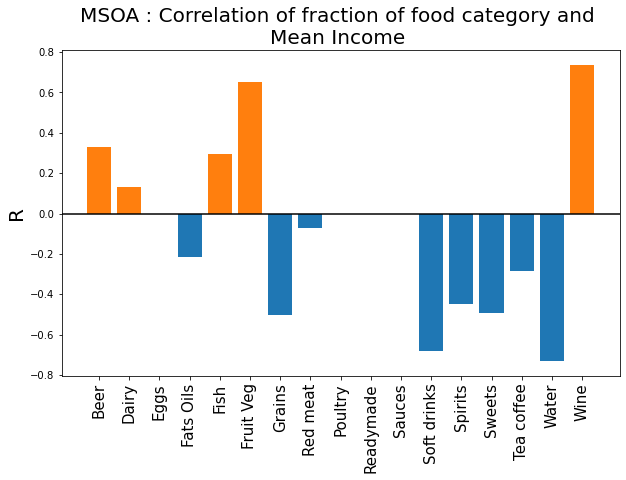

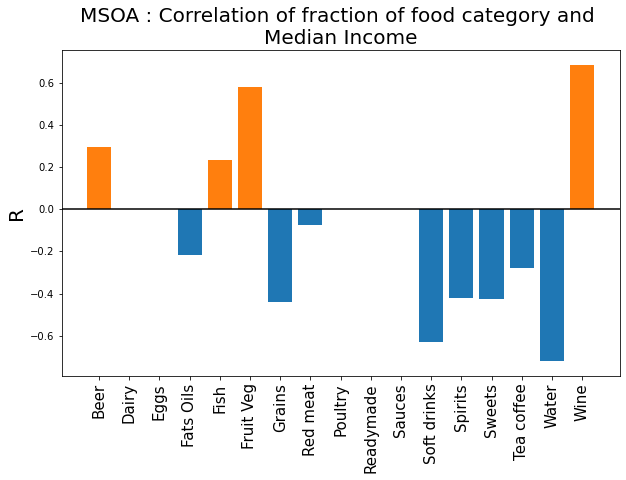

In [147]:

categories_labels = ['Beer', 'Dairy', 'Eggs', 'Fats Oils', 'Fish', 'Fruit Veg', 'Grains', 'Red meat', 
                       'Poultry', 'Readymade', 'Sauces', 'Soft drinks', 'Spirits', 'Sweets', 'Tea coffee', 
                       'Water', 'Wine']

correlation_msoa = compute_correlations_categories_incomes(df=groceries_income_msoa, income='mean_income')

fig = plt.figure(figsize=(10,6))
plt.title('MSOA : Correlation of fraction of food category and \nMean Income ', fontsize=20)
plt.bar(correlation_msoa.Category,correlation_msoa.R, color = [ 'white' if not v[3] else'tab:orange' if v[1] > 0 else 'tab:blue' for v in correlation_msoa.values])
plt.xticks(correlation_msoa.Category,categories_labels, rotation='vertical',fontsize=15)
plt.axhline(y=0,color='black') 
plt.ylabel('R',fontsize=20)
plt.show()

correlation_msoa = compute_correlations_categories_incomes(df=groceries_income_msoa, income='median_income')

fig = plt.figure(figsize=(10,6))
plt.title('MSOA : Correlation of fraction of food category and \nMedian Income', fontsize=20)
plt.bar(correlation_msoa.Category,correlation_msoa.R, color = [ 'white' if not v[3] else'tab:orange' if v[1] > 0 else 'tab:blue' for v in correlation_msoa.values])
plt.xticks(correlation_msoa.Category,categories_labels, rotation='vertical',fontsize=15)
plt.axhline(y=0,color='black') 
plt.ylabel('R',fontsize=20)
plt.show()


Index(['Category', 'R', 'p', 'statistically_significant'], dtype='object')


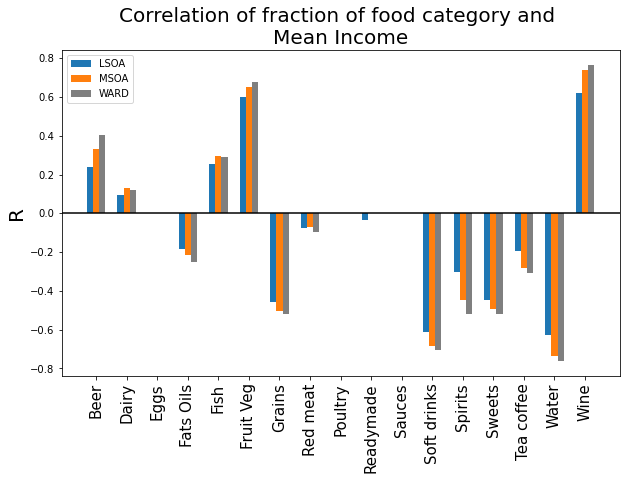

In [149]:
def color_sts(df, color): 
    return [ 'white' if not v else color for v in df.statistically_significant.values]

correlation_msoa = compute_correlations_categories_incomes(df=groceries_income_msoa, income='mean_income')
correlation_lsoa = compute_correlations_categories_incomes(df=groceries_income_lsoa, income='mean_income')
correlation_ward = compute_correlations_categories_incomes(df=groceries_income_ward, income='mean_income')

print(correlation_msoa.columns)
width = 0.2
x = np.arange(len(categories_labels))
fig = plt.figure(figsize=(10,6))
plt.title('Correlation of fraction of food category and \nMean Income', fontsize=20)
plt.bar(x - width,correlation_lsoa.R, width=width, color = color_sts(correlation_lsoa,'tab:blue'), label='LSOA')
plt.bar(x, correlation_msoa.R, width=width, color = color_sts(correlation_msoa,'tab:orange'), label='MSOA')
plt.bar(x + width,correlation_ward.R, width=width, color = color_sts(correlation_ward,'tab:grey'), label='WARD')
plt.xticks(x ,categories_labels, rotation='vertical',fontsize=15)
plt.axhline(y=0,color='black') 
plt.ylabel('R',fontsize=20)
plt.legend()
plt.show()

So here first we compute the correlations between the percentage of each food category and the mean income. Note that we obtain similar values with median(we display data below). We thus can conduct the same analysis on both dataframes and choose to do it on this one.  


First it's worth noting what these correlations mean. A positive correlation means that having a greater fraction of all the products belonging to a category relates to a higher Mean Income.
So it does not mean that people with high revenues don't buy any product of a negatively correlated category or even that they buy less. It means that the fraction of their shopping bag item belonging to that category is smaller. 
Taking the example of grains, this category being negatively correlated with income means that people with lower income overall have a bigger part of their alimentation composed of grains. 

So let's analyse these results. 
- The negatives correlation of Income with  Sweets, Spirits, Soft Drinks, Fats Oils and Grains is quite interesting because it shows that poorer neighbourhood show a higher part of the groceries dedicated to less healthy food. The correlation with spirits is also quite interesting as it might induce that poorer neighbourhood might be more prone to alcoholism or at least a higher consumption of stronger alcohol. 

- The positive correlation of Income with Fruit and Vegetables, Fish and Dairy product is also quite interesting as we here find that 'healthier' products take a bigger part of the shopping bag in areas where the income is higher. Fruit and vegetables can also be explained as people with higher incomes might be more prone to be vegetarian. Wine is also one of those positively correlated food categories and we can explain that as wine being a 'fancy drink'. 

- The fraction of water being negatively correlated with water seems quite surprising at first but we can actually make a point by finding that tap water in poorer neighbouhoods might be of lower quality forcing people there to buy more bottled water. People in richer neighbourhood might also be more likely to buy a water filtering system. It might also be that people might tend to buy big packs of water bottles in huge malls situated in industrial areas where the global Income might be lower and thus correlating it with lower Income.

- Fraction of tea and coffee being negatively correlated with income is not very, so is the positive one with beer. 

- We let aside the correlation that are not statistically significant or very low, namely eggs, poultry, red meat and ready-made food. Although for the latter, we can suppose that any worker is sensible to buying ready-made food for lunch thus it does not really correlates with the Income. 

Important to qualify these remarks : 

- The people buying food in a given area don't necessarily live in the area. 

- It might be that some big shopping center are situated in industrial places outside the city, thus not much people live there so the mean income would be quite low even though all sorts of people go shopping there. 

- We also can note that areas with really high median incomes might not be the most populated ones (finacial districts ... ) and might also not be the shopping place of a lot of people. Thus this most likely gives skewed data.

We now address some of these questions by looking at the relationship between the population of an area and its Mean Income. 

In [159]:
# Population
print(stats.spearmanr(groceries_income_msoa['population'],groceries_income_msoa['median_income']))
print(stats.spearmanr(groceries_income_msoa['population'],groceries_income_msoa['mean_income']))

# People Density 
print(stats.spearmanr(groceries_income_msoa['people_per_sq_km'],groceries_income_msoa['median_income']))
print(stats.spearmanr(groceries_income_msoa['people_per_sq_km'],groceries_income_msoa['mean_income']))

SpearmanrResult(correlation=-0.20045015788247775, pvalue=2.2805751348733914e-10)
SpearmanrResult(correlation=-0.1972479719125363, pvalue=4.437811460105744e-10)
SpearmanrResult(correlation=-0.13931343135444504, pvalue=1.1667698939963852e-05)
SpearmanrResult(correlation=-0.028859639032964624, pvalue=0.3660652019584485)


Negative correlation so areas more populated tend to have a lower mean and median income.

In [56]:
compute_correlations_categories_incomes_grouped(dfs=groceries_dfs, income='median_income')

R              p  stat_sig
category      census                                   
f_beer        lsoa    0.221357   1.022171e-54         1
              msoa    0.295807   2.656709e-21         1
              ward    0.382551   2.794284e-18         1
f_dairy       lsoa    0.033948   1.826735e-02         1
              msoa    0.053144   9.586115e-02         0
              ward    0.039917   3.813880e-01         0
f_eggs        lsoa   -0.037049   9.999073e-03         1
              msoa   -0.048691   1.271189e-01         0
              ward   -0.049929   2.734549e-01         0
f_fats_oils   lsoa   -0.189450   2.730800e-40         1
              msoa   -0.217491   5.464655e-12         1
              ward   -0.242299   6.974651e-08         1
f_fish        lsoa    0.200586   4.734918e-45         1
              msoa    0.234188   1.031700e-13         1
              ward    0.235429   1.655034e-07         1
f_fruit_veg   lsoa    0.536216   0.000000e+00         1
              msoa    0.580207   1.620123e-89         1
              ward    0.612771   3.975540e-51         1
f_grains      lsoa   -0.401310  1.740485e-186         1
              msoa   -0.438276   2.113256e-47         1
              ward   -0.457445   2.369577e-26         1
f_meat_red    lsoa   -0.074784   1.940799e-07         1
              msoa   -0.073419   2.133057e-02         1
              ward   -0.083536   6.660403e-02         0
f_poultry     lsoa   -0.005377   7.085997e-01         0
              msoa   -0.018393   5.646230e-01         0
              ward   -0.029472   5.181677e-01         0
f_readymade   lsoa    0.015154   2.922064e-01         0
              msoa    0.034034   2.864193e-01         0
              ward    0.045637   3.168734e-01         0
f_sauces      lsoa   -0.002250   8.757545e-01         0
              msoa   -0.013499   6.725114e-01         0
              ward    0.011421   8.023102e-01         0
f_soft_drinks lsoa   -0.573987   0.000000e+00         1
              msoa   -0.632284  7.321449e-111         1
              ward   -0.668482   7.667645e-64         1
f_spirits     lsoa   -0.284188   1.838452e-90         1
              msoa   -0.421735   1.147389e-43         1
              ward   -0.485348   6.538090e-30         1
f_sweets      lsoa   -0.391258  1.468349e-176         1
              msoa   -0.426821   8.576898e-45         1
              ward   -0.452808   8.609118e-26         1
f_tea_coffee  lsoa   -0.202718   5.372527e-46         1
              msoa   -0.278016   6.616976e-19         1
              ward   -0.310602   2.911649e-12         1
f_water       lsoa   -0.622212   0.000000e+00         1
              msoa   -0.722823  1.244283e-159         1
              ward   -0.769943   6.749103e-96         1
f_wine        lsoa    0.579559   0.000000e+00         1
              msoa    0.685892  1.401379e-137         1
              ward    0.717980   1.042219e-77         1

In [164]:
# Check for area with representativeness_norm > threshold

threshold = 0.3
groceries_rep_dfs = [('ward', groceries_income_ward[groceries_income_ward['representativeness_norm'] > threshold]), 
                 ('msoa', groceries_income_msoa[groceries_income_msoa['representativeness_norm'] > threshold]), 
                 ('lsoa', groceries_income_lsoa[groceries_income_lsoa['representativeness_norm'] > threshold])]

correlation_all_census_rep_02 = compute_correlations_categories_incomes_grouped(dfs=groceries_rep_dfs, income='mean_income')
correlation_all_census_rep_02

R              p  stat_sig
category      census                                   
f_beer        lsoa    0.263473   2.326872e-13         1
              msoa    0.336522   3.360654e-14         1
              ward    0.403552   4.469267e-12         1
f_dairy       lsoa    0.152805   2.673312e-05         1
              msoa    0.145197   1.407670e-03         1
              ward    0.129475   3.280064e-02         1
f_eggs        lsoa   -0.049118   1.793307e-01         0
              msoa    0.018842   6.801955e-01         0
              ward   -0.035850   5.560492e-01         0
f_fats_oils   lsoa   -0.313588   1.488025e-18         1
              msoa   -0.299768   1.915974e-11         1
              ward   -0.401643   5.751592e-12         1
f_fish        lsoa    0.237403   4.683510e-11         1
              msoa    0.344593   7.407493e-15         1
              ward    0.283065   2.092185e-06         1
f_fruit_veg   lsoa    0.731399  2.592154e-126         1
              msoa    0.767856   1.091357e-94         1
              ward    0.755543   1.619035e-51         1
f_grains      lsoa   -0.656126   2.107329e-93         1
              msoa   -0.680855   8.853886e-67         1
              ward   -0.669172   1.102318e-36         1
f_meat_red    lsoa   -0.242724   1.665609e-11         1
              msoa   -0.128220   4.856441e-03         1
              ward   -0.132529   2.886665e-02         1
f_poultry     lsoa   -0.192912   1.032906e-07         1
              msoa   -0.109440   1.634238e-02         1
              ward   -0.095460   1.162516e-01         0
f_readymade   lsoa   -0.042765   2.424218e-01         0
              msoa    0.004303   9.250150e-01         0
              ward    0.063698   2.952107e-01         0
f_sauces      lsoa   -0.054273   1.378230e-01         0
              msoa    0.020406   6.552892e-01         0
              ward    0.046948   4.406190e-01         0
f_soft_drinks lsoa   -0.714815  3.806805e-118         1
              msoa   -0.761055   4.410326e-92         1
              ward   -0.742754   5.992884e-49         1
f_spirits     lsoa   -0.298030   7.887347e-17         1
              msoa   -0.461211   1.041999e-26         1
              ward   -0.536425   1.142110e-21         1
f_sweets      lsoa   -0.559416   6.796131e-63         1
              msoa   -0.582185   5.527587e-45         1
              ward   -0.598202   8.660556e-28         1
f_tea_coffee  lsoa   -0.233344   1.013501e-10         1
              msoa   -0.334066   5.278789e-14         1
              ward   -0.336133   1.312983e-08         1
f_water       lsoa   -0.699597  3.771091e-111         1
              msoa   -0.782478  1.317654e-100         1
              ward   -0.801453   3.175887e-62         1
f_wine        lsoa    0.651424   1.171398e-91         1
              msoa    0.747590   3.595970e-87         1
              ward    0.763862   2.830457e-53         1

We can see that even if we take the areas where representativeness_norm > 0.3, the correlation stay more or less the same.

In [173]:
# Computes the correlation between Mean Income in 2012/13 and the energy from nutients  ! 
compute_correlations_categories_incomes_grouped(dfs=groceries_dfs, income='mean_income', categories=nutrients_fraction, category_name='nutrient')
correlation_nutrients = compute_correlations_categories_incomes(groceries_income_msoa, income='mean_income', categories=nutrients_fraction)
correlation_nutrients

,Category,R,p,statistically_significant
0,energy_fat,-0.296053,2.454642e-21,True
1,energy_saturate,-0.142765,7.008351e-06,True
2,energy_sugar,-0.424983,2.201584e-44,True
3,energy_protein,0.344536,8.861380e-29,True
4,energy_carb,-0.581642,4.703541e-90,True
5,energy_fibre,0.651744,6.216726e-120,True
6,energy_alcohol,0.468979,6.633793e-55,True
7,energy_tot,-0.501191,1.211114e-63,True


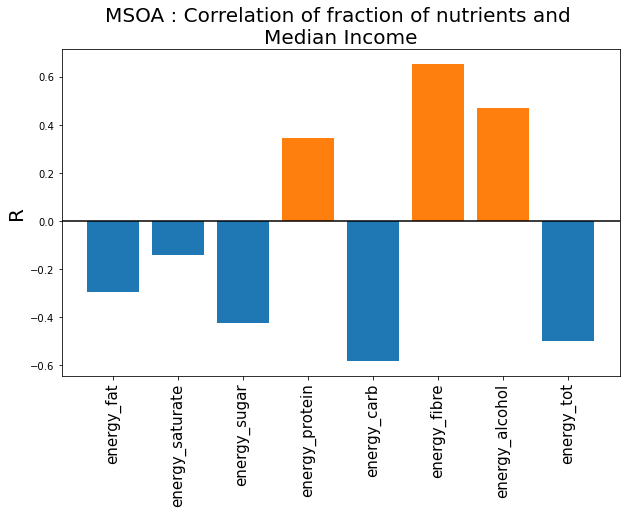

In [172]:
fig = plt.figure(figsize=(10,6))
plt.title('MSOA : Correlation of fraction of nutrients and \nMedian Income', fontsize=20)
plt.bar(correlation_nutrients.Category, correlation_nutrients.R, color = [ 'white' if not v[3] else'tab:orange' if v[1] > 0 else 'tab:blue' for v in correlation_nutrients.values])
plt.xticks(correlation_nutrients.Category,nutrients_fraction, rotation='vertical',fontsize=15)
plt.axhline(y=0,color='black') 
plt.ylabel('R',fontsize=20)
plt.show()

Makes sense w.r.t. the WHO recommendations.

We have to analyse these results ! 

- Explain what the numbers mean 
- Explain that some correlations were expectables
- Explain the surprising correlations as well. 
- Reasons why water is negatively correlated with income ? ( Everybody drinks it, but maybe the tap water quality is worse in poorer areas, so ppl need to buy bottled water )
- Discuss the fact that some areas might have skewed data (very few people actually living there, which means that very few people actually do grocery shopping there ) 
- Maybe impact of other factors ? (minorities ... ) 


### Linear Regression
Regression : https://scikit-learn.org/stable/supervised_learning.html

Simple regression first and see the results, if logistic reg give good result nice OW try using more complex models. Check the overviews pages of SK-Learn. 

Check population density for MSOA/LSOA.

Could look at the litterature on rel purchase and income, look at the finidings in litterature. 

Compare our results and compare differences or so -> Might lead to some new analysis to confirm results. 

Look for paper on google scholar but it's a bit hard and only looks at the Paper's title.
Look at paper's citations in the paper and look at the ones in our fields. 

Also looked at the 'cited-by' field. 

So we will first try and fit a linear regressor to predict Mean and Median Income and see how well it performs. 
We keep 70% of our data for training. From the previous correlation studies, we decide to use as features only the columns for which the correlation is statistically significant. 

First we'll study the case for MSOA as it is the middle sized and we can witness the same phenomena for the three areas ! 

Hence we will use for training 
**f_beer, f_dairy, f_fats_oils, f_fish, f_fruit_veg, f_grains, f_meat_red, f_soft_drinks, f_spirits, f_sweets, f_tea_coffee, f_water and f_wine**.

R-squared value is quite high ( 0.5-0.6 )

R^2 score in the random split scenario : 0.5778930273565086


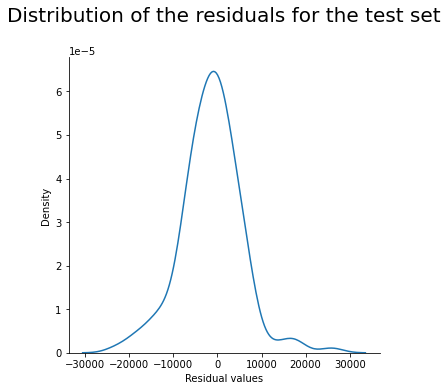

In [186]:

# Split our data for regression 
train, test = model_selection.train_test_split(groceries_income_ward, test_size=0.3)

# Select the parameters columns

columns = ['f_beer', 'f_dairy', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains',
           'f_meat_red', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine']

# Build X and Y for the training set 
X_tr = train[columns]
y_tr = train['mean_income']

# Fit the model 
reg_rd = linear_model.LinearRegression().fit(X_tr, y_tr)

# Build X and Y for the test set
X_te = test[columns]
y_te = test['mean_income']

# Predict using our model and evaluate the R-squared score
y_pred = reg_rd.predict(X_te)
r2 = reg_rd.score(X_te, y_te)
print(f'R^2 score in the random split scenario : {r2}')

residual = y_te - y_pred
lm = sns.displot(residual,kind='kde')
plt.xlabel('Residual values')
plt.title('Distribution of the residuals for the test set', fontsize=20, y=1.1)
plt.show()

In [187]:
# Probability 
def CI_2_points_off(data, nbr_draws):
    """ Bootstrap confidence interval that our regression is off by more than 2 points"""
    percentage = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        percentage[n] = ((data_tmp <= -5000) | (5000 <= data_tmp)).sum() / len(data)
    
    return np.nanpercentile(percentage, 2.5), np.median(percentage), np.nanpercentile(percentage, 97.5)

lower, median, upper = CI_2_points_off(residual, 1000)
print(f'The probability that our prediction is off by more than 5000 pounds is : {median:.5}')
print(f'The confidence interval is : ({lower:.5}, {upper:.5})')

The probability that our prediction is off by more than 5000 pounds is : 0.41379
The confidence interval is : (0.33776, 0.49655)


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

alphas = np.arange(0.1, 10, 0.1)

# Linear Regression
def linear_regression(X_train, y_train, X_test, y_test):
    linear_model = LinearRegression()
    linear_model = linear_model.fit(X_train, y_train)
    linear_model_prediction = linear_model.predict(X_test)

    #print(f"Mean squared error: {mean_squared_error(y_test, linear_model_prediction):.3f}")
    print(f"Linear Regression R2 score: {r2_score(y_test, linear_model_prediction):.3f}")
    #print(f"coefs {linear_model.coef_}")
    return linear_model_prediction

#Lasso model
def lasso_model(X_train, y_train, X_test, y_test):
    alphas = np.arange(0.1, 10, 0.1)
    best_r2_score_lasso = -99
    mse_score_related_lasso = 0
    best_alpha = 0


    for alpha in alphas:
        lasso_model = linear_model.Ridge(alpha=alpha)
        lasso_model.fit(X_train, y_train)
        lasso_model_prediction = lasso_model.predict(X_test)
        r2 = r2_score(y_test, lasso_model_prediction)
        mse = mean_squared_error(y_test, lasso_model_prediction)
        if r2 > best_r2_score_lasso:
            best_r2_score_lasso = r2
            mse_score_related_lasso = mse
            best_alpha = alpha

    print(f"A lasso model obtain the best r2 score when the lasso alpha is {best_alpha}. The r2 score is {best_r2_score_lasso:.3f} and the related mse score is {mse_score_related_lasso:.3f}")

# Ridge model
def ridge_model(X_train, y_train, X_test, y_test):
    best_r2_score_ridge = -99
    mse_score_related_ridge = 0
    best_alpha = 0


    for alpha in alphas:
        ridge_model = linear_model.Ridge(alpha=alpha)
        ridge_model.fit(X_train, y_train)
        ridge_model_prediction = ridge_model.predict(X_test)
        r2 = r2_score(y_test, ridge_model_prediction)
        mse = mean_squared_error(y_test, ridge_model_prediction)
        if r2 > best_r2_score_ridge:
            best_r2_score_ridge = r2
            mse_score_related_ridge = mse
            best_alpha = alpha

    print(f"A ridge model obtain the best r2 score when the lasso alpha is {best_alpha}. The r2 score is {best_r2_score_ridge:.3f} and the related mse score is {mse_score_related_ridge:.3f}")
    
def svm_model(X_train, y_train, X_test, y_test):
    svm_model = svm.SVR()
    svm_model = svm_model.fit(X_train, y_train)
    svm_model_prediction = svm_model.predict(X_test)

    #print(f"SVM: Mean squared error: {mean_squared_error(y_test, svm_model_prediction):.3f}")
    print(f"SVM R2 score: {r2_score(y_test, svm_model_prediction):.3f}")

    
def tree_model(X_train, y_train, X_test, y_test):
    tree_model = tree.DecisionTreeRegressor()
    tree_model = tree_model.fit(X_train, y_train)
    tree_model_prediction = tree_model.predict(X_test)

    #print(f"Decision Tree: Mean squared error: {mean_squared_error(y_test, tree_model_prediction):.3f}")
    print(f"Decision Tree R2 score: {r2_score(y_test, tree_model_prediction):.3f}")

def GBR_model(X_train, y_train, X_test, y_test):
    GBR_model = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    GBR_model = GBR_model.fit(X_train, y_train)
    GBR_model_prediction = GBR_model.predict(X_test)

    #print(f"Gradient Boosting Regressor: Mean squared error: {mean_squared_error(y_test, GBR_model_prediction):.3f}")
    print(f"Gradient Boosting Regressor R2 score: {r2_score(y_test, GBR_model_prediction):.3f}")
    
def ADA_model(X_train, y_train, X_test, y_test):
    ADA_model = AdaBoostRegressor(n_estimators=10)
    ADA_model = ADA_model.fit(X_train, y_train)
    ADA_model_prediction = ADA_model.predict(X_test)

    #print(f"ADA: Mean squared error: {mean_squared_error(y_test, ADA_model_prediction):.3f}")
    print(f"ADA R2 score: {r2_score(y_test, ADA_model_prediction):.3f}")

In [189]:
linear_regression(X_tr, y_tr, X_te, y_te)
lasso_model(X_tr, y_tr, X_te, y_te)
ridge_model(X_tr, y_tr, X_te, y_te)
svm_model(X_tr, y_tr, X_te, y_te)
tree_model(X_tr, y_tr, X_te, y_te)
GBR_model(X_tr, y_tr, X_te, y_te)
ADA_model(X_tr, y_tr, X_te, y_te)

Linear Regression R2 score: 0.578
A lasso model obtain the best r2 score when the lasso alpha is 0.1. The r2 score is 0.456 and the related mse score is 64140846.229
A ridge model obtain the best r2 score when the lasso alpha is 0.1. The r2 score is 0.456 and the related mse score is 64140846.229
SVM R2 score: 0.000
Decision Tree R2 score: 0.377
Gradient Boosting Regressor R2 score: -0.160
ADA R2 score: -0.028


We get the highest $R^2$ value for the Linear model so we will go on with this regressor for the rest of our analysis. 

Linear Regression R2 score: 0.578


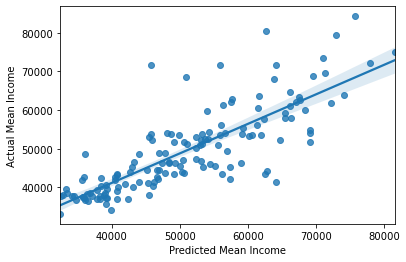

In [190]:
predicted_y = linear_regression(X_tr, y_tr, X_te, y_te)

pd.DataFrame({'Actual_Value': y_te, 'Predicted_Value': predicted_y})

import seaborn as sns 
sns.regplot(x=predicted_y, y=y_te)
plt.xlabel("Predicted Mean Income")
plt.ylabel("Actual Mean Income")
plt.show()

In [192]:
import statsmodels.formula.api as smf
logitfit3 = smf.ols(formula = 'mean_income ~ f_beer + f_dairy + f_fats_oils + f_fish + f_fruit_veg + f_grains + f_meat_red + f_soft_drinks + f_spirits + f_sweets + f_tea_coffee + f_water + f_wine', data = groceries_income_ward).fit()
print(logitfit3.summary())

                            OLS Regression Results                            
Dep. Variable:            mean_income   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     76.24
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          1.08e-106
Time:                        12:43:27   Log-Likelihood:                -5024.3
No. Observations:                 483   AIC:                         1.008e+04
Df Residuals:                     469   BIC:                         1.014e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.776e+04   6.31e+04      1.391

### TODO 

- Regression Analysis

## Limitations : 

- We are using data for 2012/13 for income Data, even though we can deduce insights thanks to our assumption, having data from 2015 would've been better ! 